In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
import statistics

import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
raw_header_df = pd.read_csv("data/RawOriginalData_Header.csv")
raw_header_df.head(3)

In [ ]:
hono_coord = raw_header_df[raw_header_df['SKN'] == 704.00]
hono_coord

In [ ]:
beretania_coord = raw_header_df[raw_header_df['SKN'] == 705.00]
beretania_coord

In [ ]:
hono_704_df = pd.read_csv("data/tab_704.csv", index_col="year")
hono_704_df

In [ ]:
beretania_705_df = pd.read_csv("data/tab_705.csv", index_col="year")
beretania_705_df

### 1. Create a visualization for the locations of all the stations using the lat, lon coordinates in the header file.

In [ ]:
lat_values = raw_header_df["Lat_DD"].copy()
print(lat_values.shape)
print(lat_values.head(3))

lon_values = raw_header_df["Lon_DD"].copy()
print(lon_values.shape)
print(lon_values.head(3))

In [ ]:
coordinate_df = pd.concat([lat_values, lon_values], axis=1)

geometry=gpd.points_from_xy(coordinate_df["Lat_DD"], coordinate_df["Lon_DD"])

station_df = gpd.GeoDataFrame(coordinate_df, geometry=geometry)
station_df.head(3)

In [ ]:
title = 'Honolulu Pump Stations'
title_html = '''
             <h3 style="font-size:20px; text-align:center;";><b>{}</b></h3>
             '''.format(title)   

# Create a Folium map
m = folium.Map(location=[float(hono_coord["Lat_DD"]), float(hono_coord["Lon_DD"])], 
               zoom_start=15,
               tiles="cartodb positron",
               position="relative"
              )

# Add a GeoJSON layer to the map
folium.GeoJson(data=station_df.to_json()).add_to(m)
m.get_root().html.add_child(folium.Element(title_html))


# Add markers to the map for each station
for i in range(len(station_df)):
    row = station_df.iloc[i]
    folium.Marker(location=[row["Lat_DD"], row["Lon_DD"]], icon=folium.Icon(color='blue')).add_to(m)

folium.Marker(location=[hono_coord["Lat_DD"], hono_coord["Lon_DD"]], icon=folium.Icon(color='orange')).add_to(m)
folium.Marker(location=[beretania_coord["Lat_DD"], beretania_coord["Lon_DD"]], icon=folium.Icon(color='orange')).add_to(m)

m

### 2. Create 2 heatmap charts for the the stations 704 and 705. You may create them separately or as side-by-side graphs.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create a list of ticks for the x-axis
# ticks = list(range(1900, 2020, 10))

# Create a heatmap of the DataFrame
sns.heatmap(hono_704_df.T, cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Hono Substation")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Month")

sns.heatmap(beretania_705_df.T, cmap="YlGnBu", ax=axes[1])
axes[1].set_title("Beretania Pump")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Month")

x_0_labels = axes[0].get_xticklabels()
x_1_labels = axes[1].get_xticklabels()

new_x_0_labels = [label if i % 3 == 0 else "" for i, label in enumerate(x_0_labels)]
new_x_1_labels = [label if i % 3 == 0 else "" for i, label in enumerate(x_1_labels)]

axes[0].set_xticklabels(new_x_0_labels)
axes[1].set_xticklabels(new_x_1_labels)


plt.show()

### 3. Explain style choices you have made for the map and the heatmap graphs, i.e. how did you frame the map, what color scale you chose for the heatmap and why, etc.

For the observation stations map, I centered the map on the stations of interest, Hono and Beretania. However, I wanted to show that the map is not simply a map of the two substations, so I cropped just enough of the map to show other substation markers in the Honolulu area. To identify the stations of interest, I set their marker colors to orange, as opposed to blue like every other station marker. Then, I simply added a title so that viewers could understand what the map is intended for.

For the observation station heatmaps, I chose the Yellow-Green-Blue color map, because it is fairly calming as opposed to the default palatte of maroons and oranges. In addition, it is a heatmap for rainfall and so the higher the rainfall measurement, the more towards blue in hue the data sample is. Then I added the standard subplot titles and axis labels.

### 4. Visually compare the overlapping period of time between the two stations. Do the stations seem to show consistency between them? How can you tell?

In [ ]:
negative_values = beretania_705_df < 0

rows_with_negative_values = beretania_705_df[negative_values.any(axis=1)]

print("Rows with Negative Values:")
print(rows_with_negative_values)

In [ ]:
post_1940_hono_704_df = hono_704_df[hono_704_df.index >= 1940]
only_pos_beretania_705_df = beretania_705_df[~negative_values.any(axis=1)]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create a list of ticks for the x-axis
# ticks = list(range(1900, 2020, 10))

# Create a heatmap of the DataFrame
sns.heatmap(post_1940_hono_704_df.T, cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Hono Substation")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Month")

sns.heatmap(only_pos_beretania_705_df.T, cmap="YlGnBu", ax=axes[1])
axes[1].set_title("Beretania Pump")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Month")

x_0_labels = axes[0].get_xticklabels()
x_1_labels = axes[1].get_xticklabels()

new_x_0_labels = [label if i % 3 == 0 else "" for i, label in enumerate(x_0_labels)]
new_x_1_labels = [label if i % 3 == 0 else "" for i, label in enumerate(x_1_labels)]

axes[0].set_xticklabels(new_x_0_labels)
axes[1].set_xticklabels(new_x_1_labels)


plt.show()

Without any cleaning of the data, it is a little hard to compare the raw data from stations 704 and 705. 705 somehow had negative values, when it's supposed to be rainfall measurement data. Perhaps a typo, but I dropped the years containing those datapoints just in case. 704 station contains data from 1904, but 705 does not start until the 1940s, so I created another subset and compare these two subseted heatmaps. Unsurprisingly, they look very similar. These stations are probably in the same zipcode, neighbors at most. So it is unsurprising that they have similar rainfall data. This is ascertained by visual inspection of the heatmaps, the color coding appears fairly similar, not exact.

### 5. What kind of observations do you think could be made if we were presented with 2 heatmaps from stations that are distant from each other?

The data would probably more interesting/variant if we looked at stations in different parts of the island. In valleys, on mountain ranges, in the metro Honolulu area, Manoa, Kapolei. Then, we are much more likely, almost certain to see more variety in the data. Manoa and Kaneohe tend to be wetter whereas the West side is known to be dry enough that wildfires are faily prevalent.

### Imagine that you were asked to design an interactive visualization system for analysts who want to process the raw dataset (on a laptop). What kind of tasks would the analysts want to perform and how could interaction help them? 

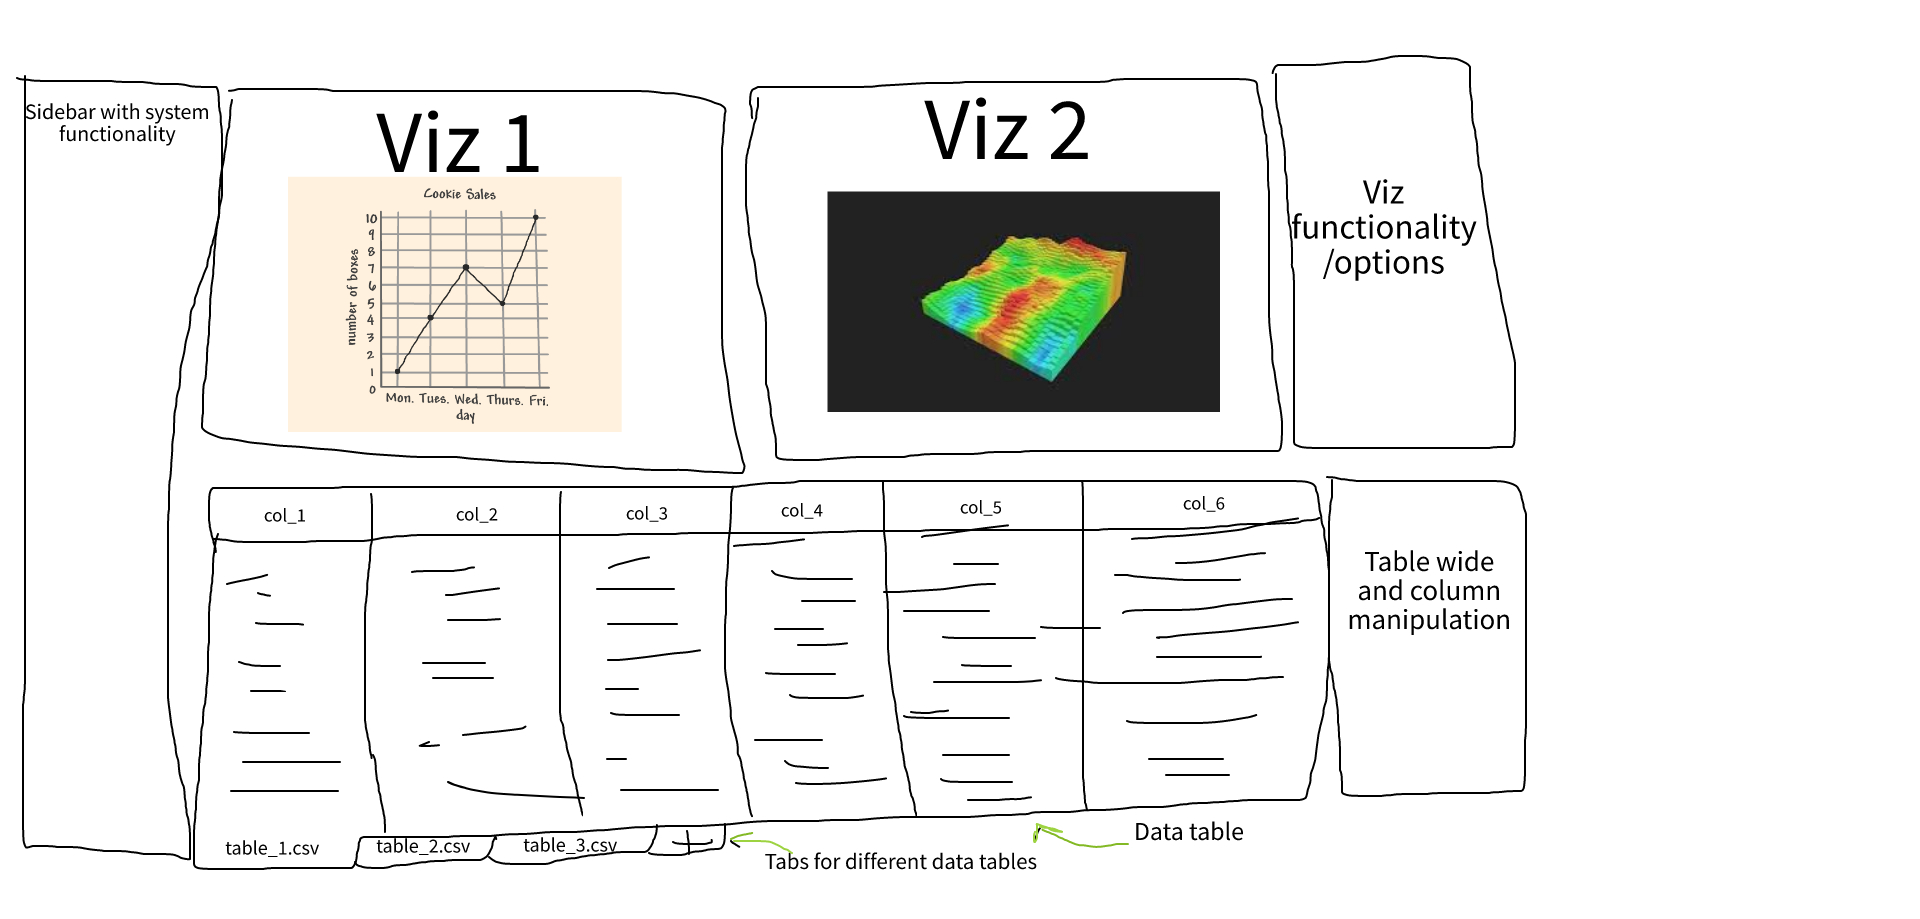

At minimum, the map should be zoomable and moveable. There are stations across all of Oahu, so being able to drag and zoom to the different areas would be a minimum requirement. The map is not just of the Honolulu area. It would be helpful to have popups for the different markers, so that if one were to mouse over the marker, it would display the name of the station. 

Regarding the heatmaps, perhaps a popover where on mouse over, the data point would display the rainfall measurement of the respective data point. A little more advanced would be some filtering options. I had to manually subset the data, but being able to do so via a dashboard would be a nice feature for anyone wanting to explore the rainfall data.

For an overall system to process any sort of data, I sketched a gui with a few different sections. A section for seeing the datasets, a couple visualizations simultaneously, a sidebar for system options, a menu for viz options, and a menu for table wide or column manipulation. Users would upload a dataset(s) and perform basic manipulation/cleaning using the menu for dataset manipulation. Things like select column(s), sort, filter, subset, etc. The vizualizations placed above will be controlled by a separate menu. Options for different visuals, graph styles, color choices, etc. The large sidebar on the left is for the system as a whole: save, import, export, etc.

In the case of the Hawaii rain dataset, a user would upload the dataset and see it in the data table section of the system. Perhaps perform some cleaning and subsetting using the data table menu. Subset for hono and beretania stations. Then turn each subset into a heatmap to visualize rainfall over the months and years. Or select station names, coordinates, and plot them on a map.